In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
import seaborn as sns

In [2]:
# path = 'C:\\Users\\fatem\\Dropbox\\Occupancy Detection\\Time-series processed data'
# os.chdir(path)

In [2]:
path = '/Users/fatemenikseresht/Dropbox/Occupancy Detection/Time-series processed data'
os.chdir(path)

In [3]:
ftm_ind_features = pd.read_csv('labeled_ftm index features_sliding win5_data.csv')

In [4]:
ftm_ind_features

,Unnamed: 0,index,ch1mean,ch1std,ch1median,ch1rme,ch2mean,ch2std,ch2median,ch2rme,...,ch8rme,ch9mean,ch9std,ch9median,ch9rme,ch10mean,ch10std,ch10median,ch10rme,label
0,0,0,9.990,11.800983,4.68,14.533088,2.626,0.192821,2.60,2.631657,...,3.744361,2.860,0.000000,2.86,2.860000,2.886,0.058138,2.86,2.886468,0
1,1,1,4.706,0.058138,4.68,4.706287,2.652,0.148223,2.60,2.655312,...,3.770000,2.860,0.000000,2.86,2.860000,2.860,0.000000,2.86,2.860000,0
2,2,2,4.706,0.058138,4.68,4.706287,2.600,0.159217,2.60,2.603897,...,3.744361,2.834,0.058138,2.86,2.834477,2.860,0.000000,2.86,2.860000,0
3,3,3,4.680,0.000000,4.68,4.680000,2.678,0.236157,2.60,2.686317,...,3.744361,2.834,0.058138,2.86,2.834477,2.886,0.058138,2.86,2.886468,0
4,4,4,4.602,0.174413,4.68,4.604643,2.704,0.266421,2.60,2.714480,...,3.718545,2.834,0.058138,2.86,2.834477,2.912,0.071204,2.86,2.912696,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,283,91,6.526,0.360735,6.37,6.533971,6.058,0.992608,6.11,6.122710,...,3.204968,2.548,0.148223,2.60,2.551447,3.692,0.148223,3.64,3.694380,2
284,284,92,6.890,0.806629,6.50,6.927671,6.630,0.806629,6.63,6.669139,...,5.423976,3.302,1.648490,2.60,3.616244,4.186,1.085325,3.77,4.297085,2
285,285,93,7.618,1.534330,7.15,7.740624,7.228,1.561624,7.28,7.361720,...,5.566672,3.718,1.606960,2.73,3.986149,4.498,1.113000,3.90,4.606845,2
286,286,94,7.930,1.573483,8.19,8.053917,7.462,1.656161,7.54,7.607611,...,5.636666,4.238,1.627857,4.42,4.481136,4.732,1.078295,5.07,4.829286,2


In [5]:
ftm_ind_features.columns

Index(['Unnamed: 0', 'index', 'ch1mean', 'ch1std', 'ch1median', 'ch1rme',
       'ch2mean', 'ch2std', 'ch2median', 'ch2rme', 'ch3mean', 'ch3std',
       'ch3median', 'ch3rme', 'ch4mean', 'ch4std', 'ch4median', 'ch4rme',
       'ch5mean', 'ch5std', 'ch5median', 'ch5rme', 'ch6mean', 'ch6std',
       'ch6median', 'ch6rme', 'ch7mean', 'ch7std', 'ch7median', 'ch7rme',
       'ch8mean', 'ch8std', 'ch8median', 'ch8rme', 'ch9mean', 'ch9std',
       'ch9median', 'ch9rme', 'ch10mean', 'ch10std', 'ch10median', 'ch10rme',
       'label'],
      dtype='object')

In [6]:
ftm_ind_features['label'].value_counts()

0    96
1    96
2    96
Name: label, dtype: int64

In [7]:
X = ftm_ind_features.dropna()
labels = X['label']
# features = X[['ch2std','ch2rme','ch3mean','ch3std','ch3rme','ch4mean','ch6std','ch1std','ch1rme','ch2mean','ch4std','ch5median','ch5rme','ch6mean','ch6rme','ch7mean','ch10std']]
# features = X[selected_features]
# features = X[rf_selected_features]
features = X.drop(['index','label','Unnamed: 0'], axis=1)
features_list = np.array(features)

In [8]:
features_label = X.drop(['index','label','Unnamed: 0'], axis=1).columns

In [9]:
train_features, test_features, train_labels, test_labels = train_test_split(features_list, labels, test_size = 0.2, random_state = 42)


In [10]:
train_labels.value_counts()

0    80
2    78
1    72
Name: label, dtype: int64

In [11]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (230, 40)
Training Labels Shape: (230,)
Testing Features Shape: (58, 40)
Testing Labels Shape: (58,)


### RF

In [12]:
# Instantiate model with 1000 decision trees
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf_model.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [13]:
# Use the forest's predict method on the test data
rf_pred_labels = rf_model.predict(test_features)

In [14]:
rf_sel = SelectFromModel(rf_model, threshold=0.02)
rf_sel.fit(train_features, train_labels)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000,
                                                 random_state=42),
                threshold=0.02)

In [15]:
# Print the name and gini importance of each feature
for feature in zip(features_label, rf_model.feature_importances_):
    print(feature)

('ch1mean', 0.02252876597034946)
('ch1std', 0.008816863417177865)
('ch1median', 0.016181387247900053)
('ch1rme', 0.02398569605738121)
('ch2mean', 0.0617214495653325)
('ch2std', 0.0074172957750505124)
('ch2median', 0.07201538382309128)
('ch2rme', 0.06411716643292106)
('ch3mean', 0.05622872258246699)
('ch3std', 0.026913449814663377)
('ch3median', 0.06475987432077943)
('ch3rme', 0.05891561093398433)
('ch4mean', 0.025321083838861093)
('ch4std', 0.01014548596662773)
('ch4median', 0.01438316967866076)
('ch4rme', 0.029491906272851146)
('ch5mean', 0.021696218277039027)
('ch5std', 0.015070062687097596)
('ch5median', 0.025819321891242624)
('ch5rme', 0.02496659549576129)
('ch6mean', 0.049944506305798685)
('ch6std', 0.005200175177235987)
('ch6median', 0.03841044194366214)
('ch6rme', 0.046215695638202665)
('ch7mean', 0.006477888822995188)
('ch7std', 0.004585436516856978)
('ch7median', 0.004976493200220484)
('ch7rme', 0.01015269984635203)
('ch8mean', 0.0067805139500356024)
('ch8std', 0.0079139203414

In [16]:
rf_selected_features = features_label[rf_sel.get_support(indices=True)]

In [17]:
features_label

Index(['ch1mean', 'ch1std', 'ch1median', 'ch1rme', 'ch2mean', 'ch2std',
       'ch2median', 'ch2rme', 'ch3mean', 'ch3std', 'ch3median', 'ch3rme',
       'ch4mean', 'ch4std', 'ch4median', 'ch4rme', 'ch5mean', 'ch5std',
       'ch5median', 'ch5rme', 'ch6mean', 'ch6std', 'ch6median', 'ch6rme',
       'ch7mean', 'ch7std', 'ch7median', 'ch7rme', 'ch8mean', 'ch8std',
       'ch8median', 'ch8rme', 'ch9mean', 'ch9std', 'ch9median', 'ch9rme',
       'ch10mean', 'ch10std', 'ch10median', 'ch10rme'],
      dtype='object')

In [18]:
for feature_list_index in rf_sel.get_support(indices=True):
#     print(feature_list_index)
    print(features_label[feature_list_index])

ch1mean
ch1rme
ch2mean
ch2median
ch2rme
ch3mean
ch3std
ch3median
ch3rme
ch4mean
ch4rme
ch5mean
ch5median
ch5rme
ch6mean
ch6median
ch6rme
ch10mean
ch10median
ch10rme


In [21]:
confusion_matrix(test_labels, rf_pred_labels, labels=[0, 1, 2])
accuracy = accuracy_score(test_labels, rf_pred_labels)
recall = recall_score(test_labels, rf_pred_labels, average='weighted' )
precision = precision_score(test_labels, rf_pred_labels, average='weighted')
F1 = f1_score(test_labels, rf_pred_labels, average='weighted' )

In [22]:
confusion_matrix(test_labels, rf_pred_labels, labels=[0, 1, 2])

array([[16,  0,  0],
       [ 0, 23,  1],
       [ 0,  0, 18]])

In [23]:
F1

0.9828081933731238

In [24]:
accuracy

0.9827586206896551

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


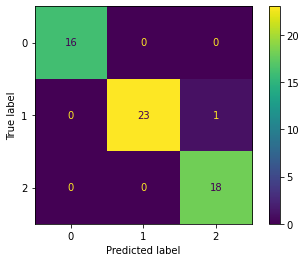

In [25]:
plot_confusion_matrix(rf_model, test_features, test_labels)  
plt.show()

### KNN

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_features, train_labels)

KNeighborsClassifier()

In [28]:
knn_pred_labels = knn_model.predict(test_features)

In [29]:
knn_sel = SelectFromModel(knn_model, threshold=0.02)
knn_sel.fit(train_features, train_labels)

SelectFromModel(estimator=KNeighborsClassifier(), threshold=0.02)

In [30]:
knn_feature_importance = permutation_importance(knn_model, train_features, train_labels, scoring='accuracy').importances_mean

for feature in zip(features_label, knn_feature_importance):
    print(feature)

('ch1mean', 0.00260869565217392)
('ch1std', 0.004347826086956519)
('ch1median', 0.0)
('ch1rme', 0.00956521739130436)
('ch2mean', 0.0008695652173912993)
('ch2std', 0.0)
('ch2median', 0.0008695652173912993)
('ch2rme', 0.0008695652173912993)
('ch3mean', 0.01043478260869568)
('ch3std', 0.0)
('ch3median', 0.013043478260869578)
('ch3rme', 0.01043478260869568)
('ch4mean', 0.0008695652173913215)
('ch4std', 0.0)
('ch4median', 0.0)
('ch4rme', -0.0008695652173912993)
('ch5mean', 0.00521739130434784)
('ch5std', 0.0017391304347825986)
('ch5median', 0.0008695652173912993)
('ch5rme', 0.00521739130434784)
('ch6mean', 0.006956521739130461)
('ch6std', 0.0)
('ch6median', 0.009565217391304382)
('ch6rme', 0.00608695652173914)
('ch7mean', 0.0008695652173912993)
('ch7std', 0.0017391304347825986)
('ch7median', 0.00260869565217392)
('ch7rme', 0.002608695652173898)
('ch8mean', 0.002608695652173898)
('ch8std', 0.0008695652173912993)
('ch8median', 0.0017391304347825986)
('ch8rme', 0.0)
('ch9mean', 0.0026086956521

In [31]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

NameError: name 'importance' is not defined

In [87]:
# knn_selected_features = features_label[knn_sel.get_support(indices=True)]

In [32]:
confusion_matrix(test_labels, knn_pred_labels, labels=[0, 1, 2])

array([[16,  0,  0],
       [ 0, 24,  0],
       [ 0,  1, 17]])

In [33]:
accuracy = accuracy_score(test_labels, knn_pred_labels)
recall = recall_score(test_labels, knn_pred_labels, average='weighted' )
precision = precision_score(test_labels, knn_pred_labels, average='weighted')
F1 = f1_score(test_labels, knn_pred_labels, average='weighted' )

In [34]:
accuracy

0.9827586206896551

In [35]:
F1

0.9826882477128781

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


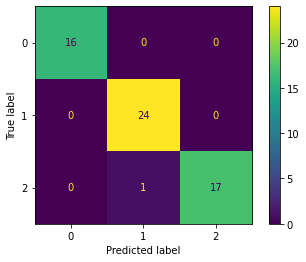

In [36]:
plot_confusion_matrix(knn_model, test_features, test_labels)  
plt.show()

### GB

In [37]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=160, objective='multi:softprob', random_state = 2022, verbosity = 0, silent=True)
xgb_model.fit(train_features, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=160,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=2022, reg_alpha=0, ...)

In [38]:
xgb_pred_labels = xgb_model.predict(test_features)

In [39]:
xgb_sel = SelectFromModel(xgb_model, threshold=0.02)
xgb_sel.fit(train_features, train_labels)

SelectFromModel(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                        callbacks=None, colsample_bylevel=1,
                                        colsample_bynode=1, colsample_bytree=1,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, gamma=0, gpu_id=-1,
                                        grow_policy='depthwise',
                                        importance_type=None,
                                        interaction_constraints='',
                                        learning_rate=0.1, max_bin=256,
                                        max_cat_to_onehot=4, max_delta_step=0,
                                        max_depth=5, max_leaves=0,
                                        min_child_weight=1, missing=nan,
                                        monotone_constraints='()',
    

In [40]:
# Print the name and gini importance of each feature
for feature in zip(features_label, xgb_model.feature_importances_):
    print(feature)

('ch1mean', 0.03116571)
('ch1std', 0.009969647)
('ch1median', 0.005639886)
('ch1rme', 0.0010200945)
('ch2mean', 0.2647309)
('ch2std', 0.0051231654)
('ch2median', 0.20310372)
('ch2rme', 0.00585186)
('ch3mean', 0.0057707424)
('ch3std', 0.019542467)
('ch3median', 0.002348312)
('ch3rme', 0.0010224964)
('ch4mean', 0.0025763307)
('ch4std', 0.008770349)
('ch4median', 0.004142136)
('ch4rme', 0.0009658978)
('ch5mean', 0.005824815)
('ch5std', 0.037589386)
('ch5median', 0.096428744)
('ch5rme', 0.003870995)
('ch6mean', 0.056388594)
('ch6std', 0.008039948)
('ch6median', 0.0073372857)
('ch6rme', 0.0050307056)
('ch7mean', 0.0)
('ch7std', 0.0014368135)
('ch7median', 0.00061021955)
('ch7rme', 0.0019303052)
('ch8mean', 0.013331831)
('ch8std', 0.00603256)
('ch8median', 0.0058902637)
('ch8rme', 0.0012136893)
('ch9mean', 0.13235974)
('ch9std', 0.0055147125)
('ch9median', 0.022963174)
('ch9rme', 0.0028082419)
('ch10mean', 0.008461942)
('ch10std', 0.004535417)
('ch10median', 1.7004868e-05)
('ch10rme', 0.0006

In [41]:
xgb_selected_features = features_label[xgb_sel.get_support(indices=True)]

In [42]:
for feature_list_index in xgb_sel.get_support(indices=True):
    print(str(features_label[feature_list_index]))

ch1mean
ch2mean
ch2median
ch5std
ch5median
ch6mean
ch9mean
ch9median


In [43]:
confusion_matrix(test_labels, xgb_pred_labels, labels=[0, 1, 2])

array([[16,  0,  0],
       [ 0, 23,  1],
       [ 0,  2, 16]])

In [44]:
accuracy = accuracy_score(test_labels, xgb_pred_labels)
recall = recall_score(test_labels, xgb_pred_labels, average='weighted' )
precision = precision_score(test_labels, xgb_pred_labels, average='weighted')
F1 = f1_score(test_labels, xgb_pred_labels, average='weighted' )

In [101]:
accuracy

0.9482758620689655

In [102]:
F1

0.9480647431386348

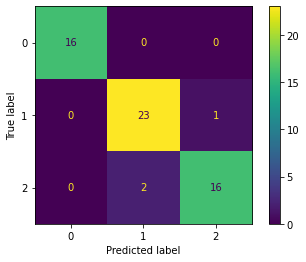

In [103]:
plot_confusion_matrix(xgb_model, test_features, test_labels)  
plt.show()

### LR

In [104]:
lr_model = LogisticRegression(random_state=2022)
lr_model.fit(train_features, train_labels)


C:\Users\fatem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2022)

In [105]:
lr_pred_labels = lr_model.predict(test_features)

In [106]:
confusion_matrix(test_labels, lr_pred_labels, labels=[0, 1, 2])

array([[16,  0,  0],
       [ 0, 24,  0],
       [ 0,  2, 16]], dtype=int64)

In [107]:
accuracy = accuracy_score(test_labels, lr_pred_labels)
recall = recall_score(test_labels, lr_pred_labels, average='weighted' )
precision = precision_score(test_labels, lr_pred_labels, average='weighted')
F1 = f1_score(test_labels, lr_pred_labels, average='weighted' )

In [108]:
accuracy

0.9655172413793104

In [109]:
F1

0.9651926977687627

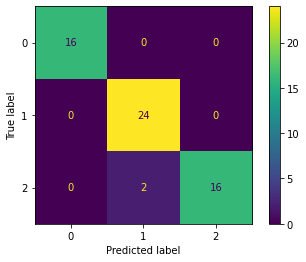

In [110]:
plot_confusion_matrix(lr_model, test_features, test_labels)  
plt.show()

### SVM

In [125]:
svm_model = svm.SVC(decision_function_shape='ovr', random_state = 2022)
svm_model.fit(train_features, train_labels)

# lin_clf = svm.LinearSVC()
# lin_clf.fit(train_features, train_labels)

SVC(random_state=2022)

In [126]:
svm_pred_labels = svm_model.predict(test_features)


In [153]:
svm_sel = SelectFromModel(svm_pred_labels, prefit=True)
svm_sel.fit(train_features, train_labels)

NotFittedError: Since 'prefit=True', call transform directly

In [ ]:
svm_selected_features = features_label[svm_sel.get_support(indices=True)]

In [127]:
confusion_matrix(test_labels, svm_pred_labels, labels=[0, 1, 2])

array([[16,  0,  0],
       [ 0, 24,  0],
       [ 0,  5, 13]], dtype=int64)

In [128]:
accuracy = accuracy_score(test_labels, svm_pred_labels)
recall = recall_score(test_labels, svm_pred_labels, average='weighted' )
precision = precision_score(test_labels, svm_pred_labels, average='weighted')
F1 = f1_score(test_labels, svm_pred_labels, average='weighted' )

In [129]:
accuracy

0.9137931034482759

In [130]:
F1

0.9109072974164165

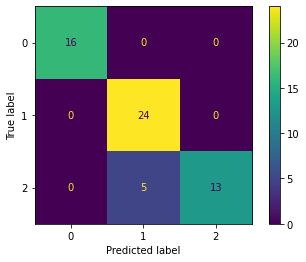

In [131]:
plot_confusion_matrix(svm_model, test_features, test_labels)  
plt.show()